## Laboratorio I - Femicidios - Grupo 12: Clerici, Pérez

# Laboratorio I



In [1]:
# %matplotlib notebook
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
sns.set_context('talk')

## Estadísticas oficiales de femicidio

In [2]:
# Cargar dataset
dataset = pd.read_csv('http://datos.jus.gob.ar/dataset/27bb9b2c-521b-406c-bdf9-98110ef73f34/resource/a2e1c899-cbaa-4bf6-b623-6648f150cab0/download/registro-de-femicidios-2018-04-13.csv', 
                      encoding='utf8')
# quitar tilde de nombre de columna número
dataset.loc[:,'numero'] = dataset[u'número']
#elimino la columna que queda con 'número' con tilde
dataset = dataset.drop('número', axis=1)
dataset.head(5)

,edad,identidad_genero,tipo_victima,lugar_hecho,modalidad_comisiva,fecha_hecho,numero
0,8,MUJER,VINCULADO,Buenos Aires,QUEMADURAS -,2018-04-06,1108
1,11,MUJER,VINCULADO,Buenos Aires,QUEMADURAS -,2018-04-06,1108
2,31,MUJER,PRINCIPAL,Buenos Aires,QUEMADURAS -,2018-04-06,1108
3,22,MUJER,PRINCIPAL,Chaco,ASFIXIA - DEGOLLAMIENTO -,2018-04-15,1107
4,18,MUJER,PRINCIPAL,Chaco,ASFIXIA - DEGOLLAMIENTO -,2018-04-15,1107


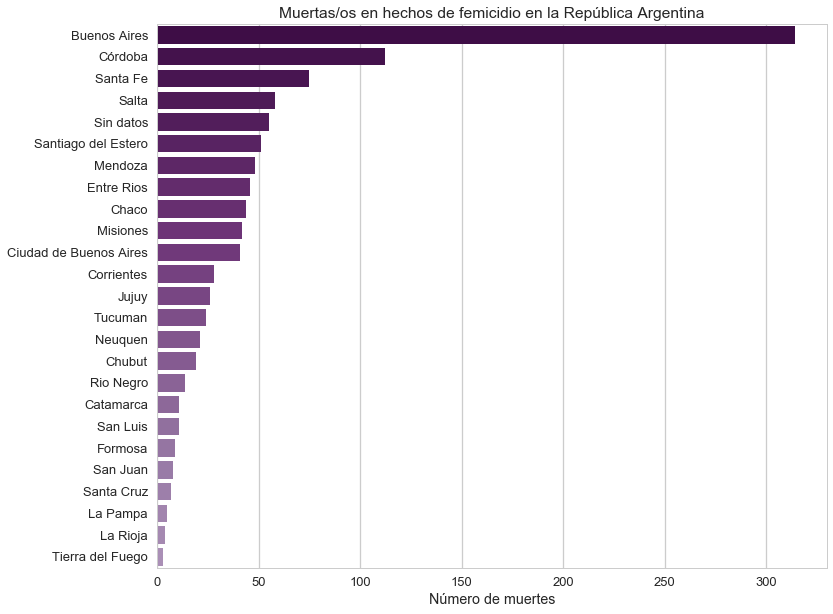

In [107]:
fig = plt.figure(figsize=(12,10))
# graficar violencia por provincia
ax = sns.countplot(data=dataset, y='lugar_hecho', 
                   palette=sns.color_palette("PRGn", 100), 
                   order=dataset['lugar_hecho'].value_counts().index
                  )
ax.set_ylabel('')
ax.set_title('Muertas/os en hechos de femicidio en la República Argentina')
ax.set_xlabel('Número de muertes')
plt.show()

El gráfico anterior no es representativo de las muertes por violencia de género en cada provincia ya que no tiene en cuenta la cantidad de habitantes en cada una. En este caso una provincia como Buenos Aires puede ser considerada como la más violenta hacia las mujeres si no se observa que posee gran parte de la población argentina. Una forma de mostrar esto correctamente es pesar la cantidad de femicidios por cantidad de habitantes, lo que dará una idea de *densidad* de femicidios por provincia.

Buscamos los datos del Censo 2010 porque nos interesa conocer la cantidad de femicidios por habitante. Los datos fueron obtenidos de https://www.sig.indec.gov.ar/censo2010/ y se encuentran en el archivo `numero-habitantes-provincia-censo2010.txt`.

In [108]:
censo2010 = pd.read_csv('numero-habitantes-provincia-censo2010.csv')
censo2010 = censo2010[['provincia', 'numero_habitantes']]
censo2010.head(4)

,provincia,numero_habitantes
0,Ciudad de Buenos Aires,2890151
1,Tucuman,1448188
2,Buenos Aires,15625084
3,Misiones,1101593


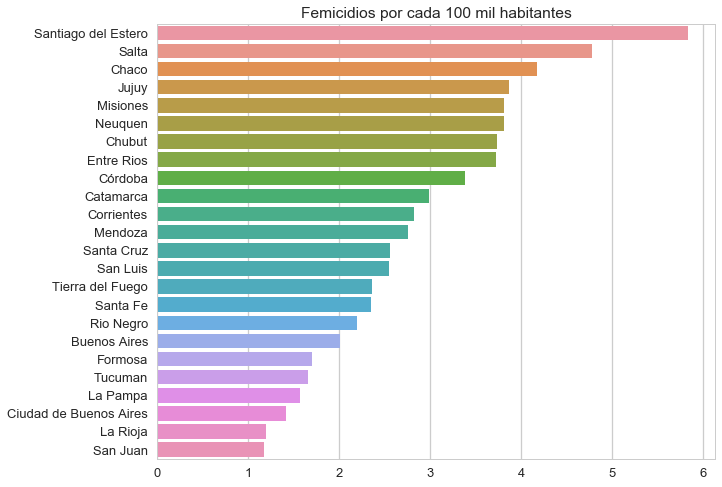

In [122]:
# femicidios por provincia
ds = dataset['lugar_hecho'].value_counts()
# habitantes por provincia
cs = pd.Series(censo2010['numero_habitantes'].get_values(), index=censo2010['provincia'])
fem_x_hab = ds.div(cs)
# sacamos los datos donde no se especifica pronvincia del hecho y multiplicamos por 100.000
fem_x_hab = fem_x_hab.dropna().div(1/100000).sort_values(ascending=False)
fig2 = plt.figure(figsize=(10,8))
ax1 = sns.barplot(x=fem_x_hab.get_values(), y=fem_x_hab.index)
#ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
ax1.set_title('Femicidios por cada 100 mil habitantes')
plt.show()

Se pensó mostrar el resultado anterior en un mapa de la República Argentina con un color en niveles de intensidad, pero el ojo humano distingue mejor diferencias entre tamaños que entre niveles de intensidad de un color. El mapa de argentina en niveles de intensidad de un color hubiese quedado muy bonito, pero habría sido ineficiente a la hora de mostrar la diferencia concreta entre provincias.

En cambio, mostrar barras y la idea de "*número de muertes cada 100 mil habitantes*" es de fácil interpretación para cualquier lector.

### Distribución de edad de mujeres víctimas de femicidios

Estadísticas de mujeres muertas en femicidios como víctima principal.
La media es: 33
La mediana: 30
Y la moda: 22



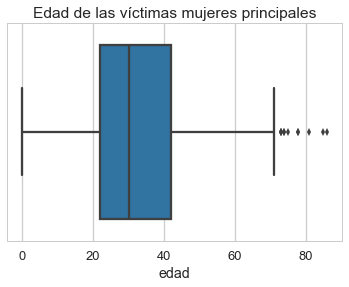

In [152]:
#sacamos la edad de mujeres principales
edad_mujer_p = dataset.where((dataset['identidad_genero']=='MUJER') & 
                             (dataset['edad']!="Sin datos") & 
                             (dataset["tipo_victima"]=='PRINCIPAL')
                            )
edad_mujer_p = edad_mujer_p.dropna()['edad'].apply(float)

#hay un dato mal cargado que dice que hay una mujer de 999 años
edad_mujer_p = edad_mujer_p.where(edad_mujer_p < 200.0)
print('Estadísticas de mujeres muertas en femicidios como víctima principal.')
print("La media es: {}\nLa mediana: {}\nY la moda: {}\n".format(str(int(round(edad_mujer_p.mean()))),
                                                                str(int(edad_mujer_p.median())),
                                                                str(int(edad_mujer_p.mode()[0]))
                                                               )
     )
principal = sns.boxplot(edad_mujer_p)
principal.set_title("Edad de las víctimas mujeres principales")
plt.show()

Estadísticas de mujeres muertas en femicidios como víctima vinculada.
La media es: 28
La mediana: 19
Y la moda: 11 y 19 años



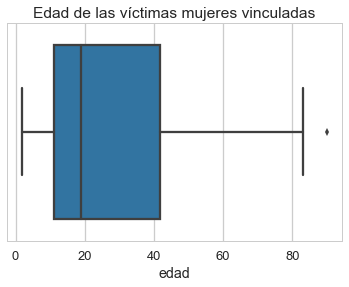

In [151]:
#sacamos la edad de mujeres vinculadas
edad_mujer_v = dataset.where((dataset['identidad_genero']=='MUJER') & 
                             (dataset['edad']!="Sin datos") & 
                             (dataset["tipo_victima"]=='VINCULADO')
                            )
edad_mujer_v = edad_mujer_v.dropna()['edad'].apply(float)

#hay un dato mal cargado que dice que hay una mujer de 999 años
edad_mujer_v = edad_mujer_v.where(edad_mujer_v < 200.0)
print('Estadísticas de mujeres muertas en femicidios como víctima vinculada.')
print("La media es: {}\nLa mediana: {}\nY la moda: {} y {} años\n".format(str(int(round(edad_mujer_v.mean()))),
                                                                str(int(edad_mujer_v.median())),
                                                                str(int(edad_mujer_v.mode()[0])),
                                                                str(int(edad_mujer_v.mode()[1]))
                                                               )
     )
principal = sns.boxplot(edad_mujer_v)
principal.set_title("Edad de las víctimas mujeres vinculadas")
plt.show()

Estadísticas del total de mujeres muertas en femicidios (principales y vinculadas)
La media es: 32
La mediana: 30
Y la moda: 22



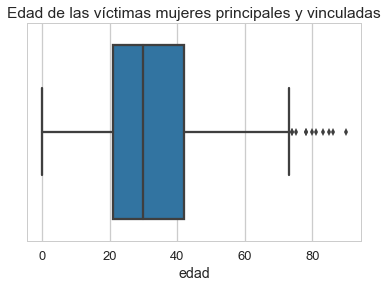

In [165]:
#sacamos la edad de solo las mujeres principales y vinculadas
edad_mujer = dataset.where((dataset['identidad_genero']=='MUJER') & 
                           (dataset['edad']!="Sin datos")
                          )
edad_mujer = edad_mujer.dropna()['edad'].apply(float)

#hay un dato mal cargado que dice que hay una mujer de 999 años
edad_mujer = edad_mujer.where(edad_mujer < 200.0)

print('Estadísticas del total de mujeres muertas en femicidios (principales y vinculadas)')
print("La media es: {}\nLa mediana: {}\nY la moda: {}\n".format(str(int(round(edad_mujer.mean()))),
                                                                str(int(edad_mujer.median())),
                                                                str(int(edad_mujer.mode()[0]))
                                                               )
     )
total = sns.boxplot(edad_mujer)
total.set_title("Edad de las víctimas mujeres principales y vinculadas")
plt.show()

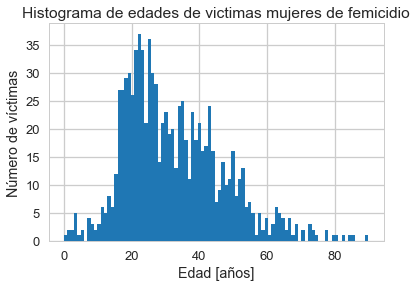

In [167]:
ax3=edad_mujer.hist(bins=91)
ax3.set_title('Histograma de edades de victimas mujeres de femicidio')
ax3.set_xlabel('Edad [años]')
ax3.set_ylabel('Número de víctimas')
plt.show()

In [25]:
cant_mujeres = edad_mujer.count()
def pmf(x,serie):
    sum = 0
    for i in serie:
        if i == x:
            sum =  sum + 1
    sum = sum/(serie.dropna().size)
    return sum

def cmf(x,serie):
    sum = 0
    for i in serie.drop_duplicates():
        if i<=x:
            sum = sum + pmf(i,serie)
    return sum

**Distribución de las víctimas hombres (todas victimas vinculadas)**

In [170]:
#sacamos la edad de solo los hombres
edad_hombre = dataset.where((dataset['identidad_genero'] == 'HOMBRE') & 
                            (dataset['edad']!="Sin datos")
                           )
edad_hombre = edad_hombre.dropna()['edad'].apply(float)
edad_hombre.describe()

count    35.000000
mean     21.571429
std      19.315166
min       0.000000
25%       5.000000
50%      20.000000
75%      32.000000
max      70.000000
Name: edad, dtype: float64

Estadísticas del hombres muertos en femicidios (todos vinculados)
La media es: 22
La mediana: 20
Y la moda: 3, 4 y 7



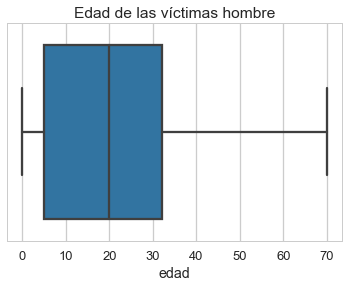

In [176]:
print('Estadísticas del hombres muertos en femicidios (todos vinculados)')
print("La media es: {}\nLa mediana: {}\nY la moda: {}, {} y {}\n".format(str(int(round(edad_hombre.mean()))),
                                                                str(int(edad_hombre.median())),
                                                                str(int(edad_hombre.mode()[0])),
                                                                str(int(edad_hombre.mode()[1])),
                                                                str(int(edad_hombre.mode()[2]))
                                                               )
     )
hombre_box = sns.boxplot(edad_hombre)
hombre_box.set_title("Edad de las víctimas hombre")
plt.show()

### Edad de las victimas de femicidio

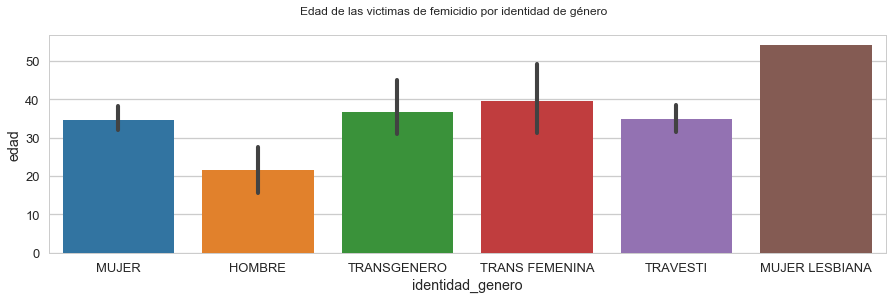

In [179]:
fig = plt.figure(figsize=(15,4))
edad_muertxs = dataset.where((dataset['identidad_genero'] != 'Sin datos') & 
                             (dataset['edad'] != 'Sin datos')
                            )
sns.barplot(x = 'identidad_genero', 
            y = edad_muertxs.edad.dropna().apply(float), 
            data = edad_muertxs)
plt.suptitle('Edad de las victimas de femicidio por identidad de género')
plt.show()

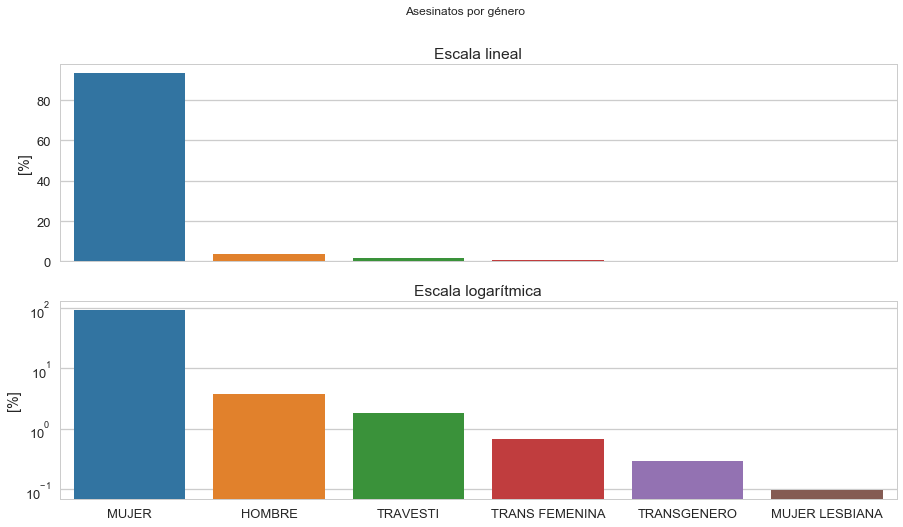

In [32]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15,8) ,sharex=True)

sns.barplot(x= dataset['identidad_genero'].where(dataset['identidad_genero'] != 'Sin datos').value_counts().index,
            y=100*dataset['identidad_genero'].where(dataset['identidad_genero'] != 'Sin datos').value_counts(normalize=True), 
            data=dataset,
            ax = ax1)
sns.barplot(x= dataset['identidad_genero'].where(dataset['identidad_genero'] != 'Sin datos').value_counts().index,
            y=100*dataset['identidad_genero'].where(dataset['identidad_genero'] != 'Sin datos').value_counts(normalize=True), 
            data=dataset,
            ax = ax2)

ax2.set_yscale('log')
ax1.set_ylabel('[%]')
ax2.set_ylabel('[%]')
fig.suptitle('Asesinatos por género')
ax1.set_title('Escala lineal')
ax2.set_title('Escala logarítmica')
plt.show()

Al mostrar el gráfico anterior (arriba), se observa que las mujeres son las mayores víctimas en hechos de femicidio, a tal punto que un gráfico de barras no permite apreciar el resto de los géneros. Para poder observar los datos de los otros géneros, se puede mostrar un gráfico con los porcentajes en escala logarítmica, como el de abajo.

In [180]:
def yeartoint(fecha):
    if (fecha != 'Sin datos'):
        return int(fecha.split('-')[0])
    else:
        return np.nan

def monthtoint(fecha):
    if (fecha != 'Sin datos'):
        return int(fecha.split('-')[1])
    else:
        return np.nan

In [181]:
fecha_anio = dataset['fecha_hecho'].apply(yeartoint)
fecha_mes = dataset['fecha_hecho'].apply(monthtoint)
fecha_anio_principal = dataset.where((dataset['tipo_victima'] == 'PRINCIPAL')).dropna()['fecha_hecho'].apply(yeartoint)
fecha_mes_principal = dataset.where(dataset['tipo_victima'] == 'PRINCIPAL').dropna()['fecha_hecho'].apply(monthtoint)

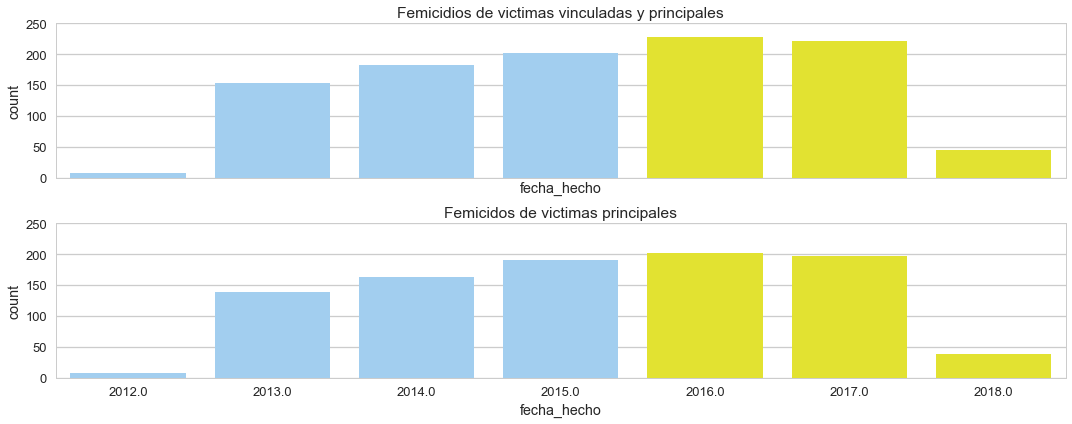

In [182]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(15,6), sharex=True)
palette = sns.xkcd_palette(["light blue","light blue","light blue","light blue",
                             "yellow","yellow","yellow"])
sns.countplot(fecha_anio, ax=ax1, palette=palette)
sns.countplot(fecha_anio_principal, ax=ax2, palette=palette)
ax1.set_ylim(0, 250)
ax1.set_title("Femicidios de victimas vinculadas y principales")
ax2.set_title("Femicidos de victimas principales")
ax2.set_ylim(0, 250)
fig.tight_layout()

In [183]:
dataset_2 = dataset.copy()
dataset_2["fecha_hecho"]=dataset_2["fecha_hecho"].apply(yeartoint)

/anaconda3/envs/diplodatos-ayv/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


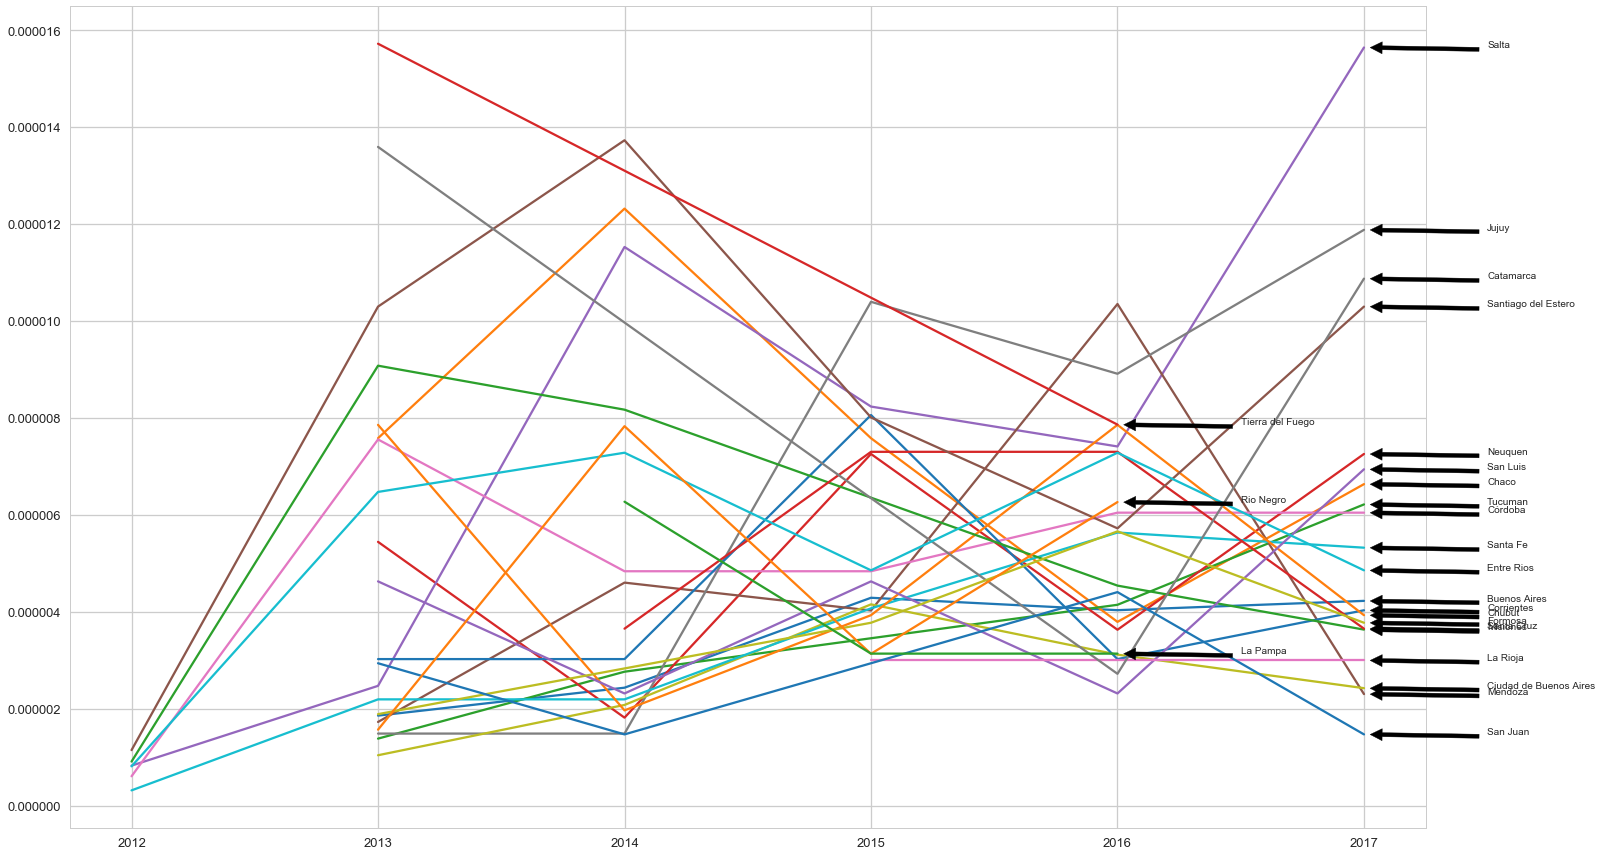

In [184]:
def data_prov(prov):
    prov_dataset = dataset_2.where((dataset_2.tipo_victima=='PRINCIPAL')&(dataset_2.lugar_hecho==prov))
    return prov_dataset.dropna()

provincias = dataset_2["lugar_hecho"].drop_duplicates().drop(193)
fig = plt.figure(figsize=(20,12))

for provincia in provincias:
    hab = censo2010.where(censo2010.provincia==provincia).dropna()["numero_habitantes"].get_values()[0]
    ax = fig.add_subplot(111)
    prov = data_prov(provincia)["fecha_hecho"].value_counts().to_dict()
    if 2018.0 in prov.keys():
        del prov[2018.0]
    list = sorted(prov.items())
    x,y = zip(*list)
    y = y/hab
    line, = ax.plot(x,y,'-')
    ax.annotate(provincia,xy=(x[len(x)-1],y[len(y)-1]),xytext=(x[len(x)-1]+0.5,y[len(y)-1]),arrowprops=dict(facecolor='black', shrink=0.05),)
    plt.tight_layout()

In [185]:
hab = censo2010.where(censo2010.provincia=="Córdoba").dropna()["numero_habitantes"]
hab.get_values()[0]

3308876.0

""Exploro sobre los tipos de homicidio

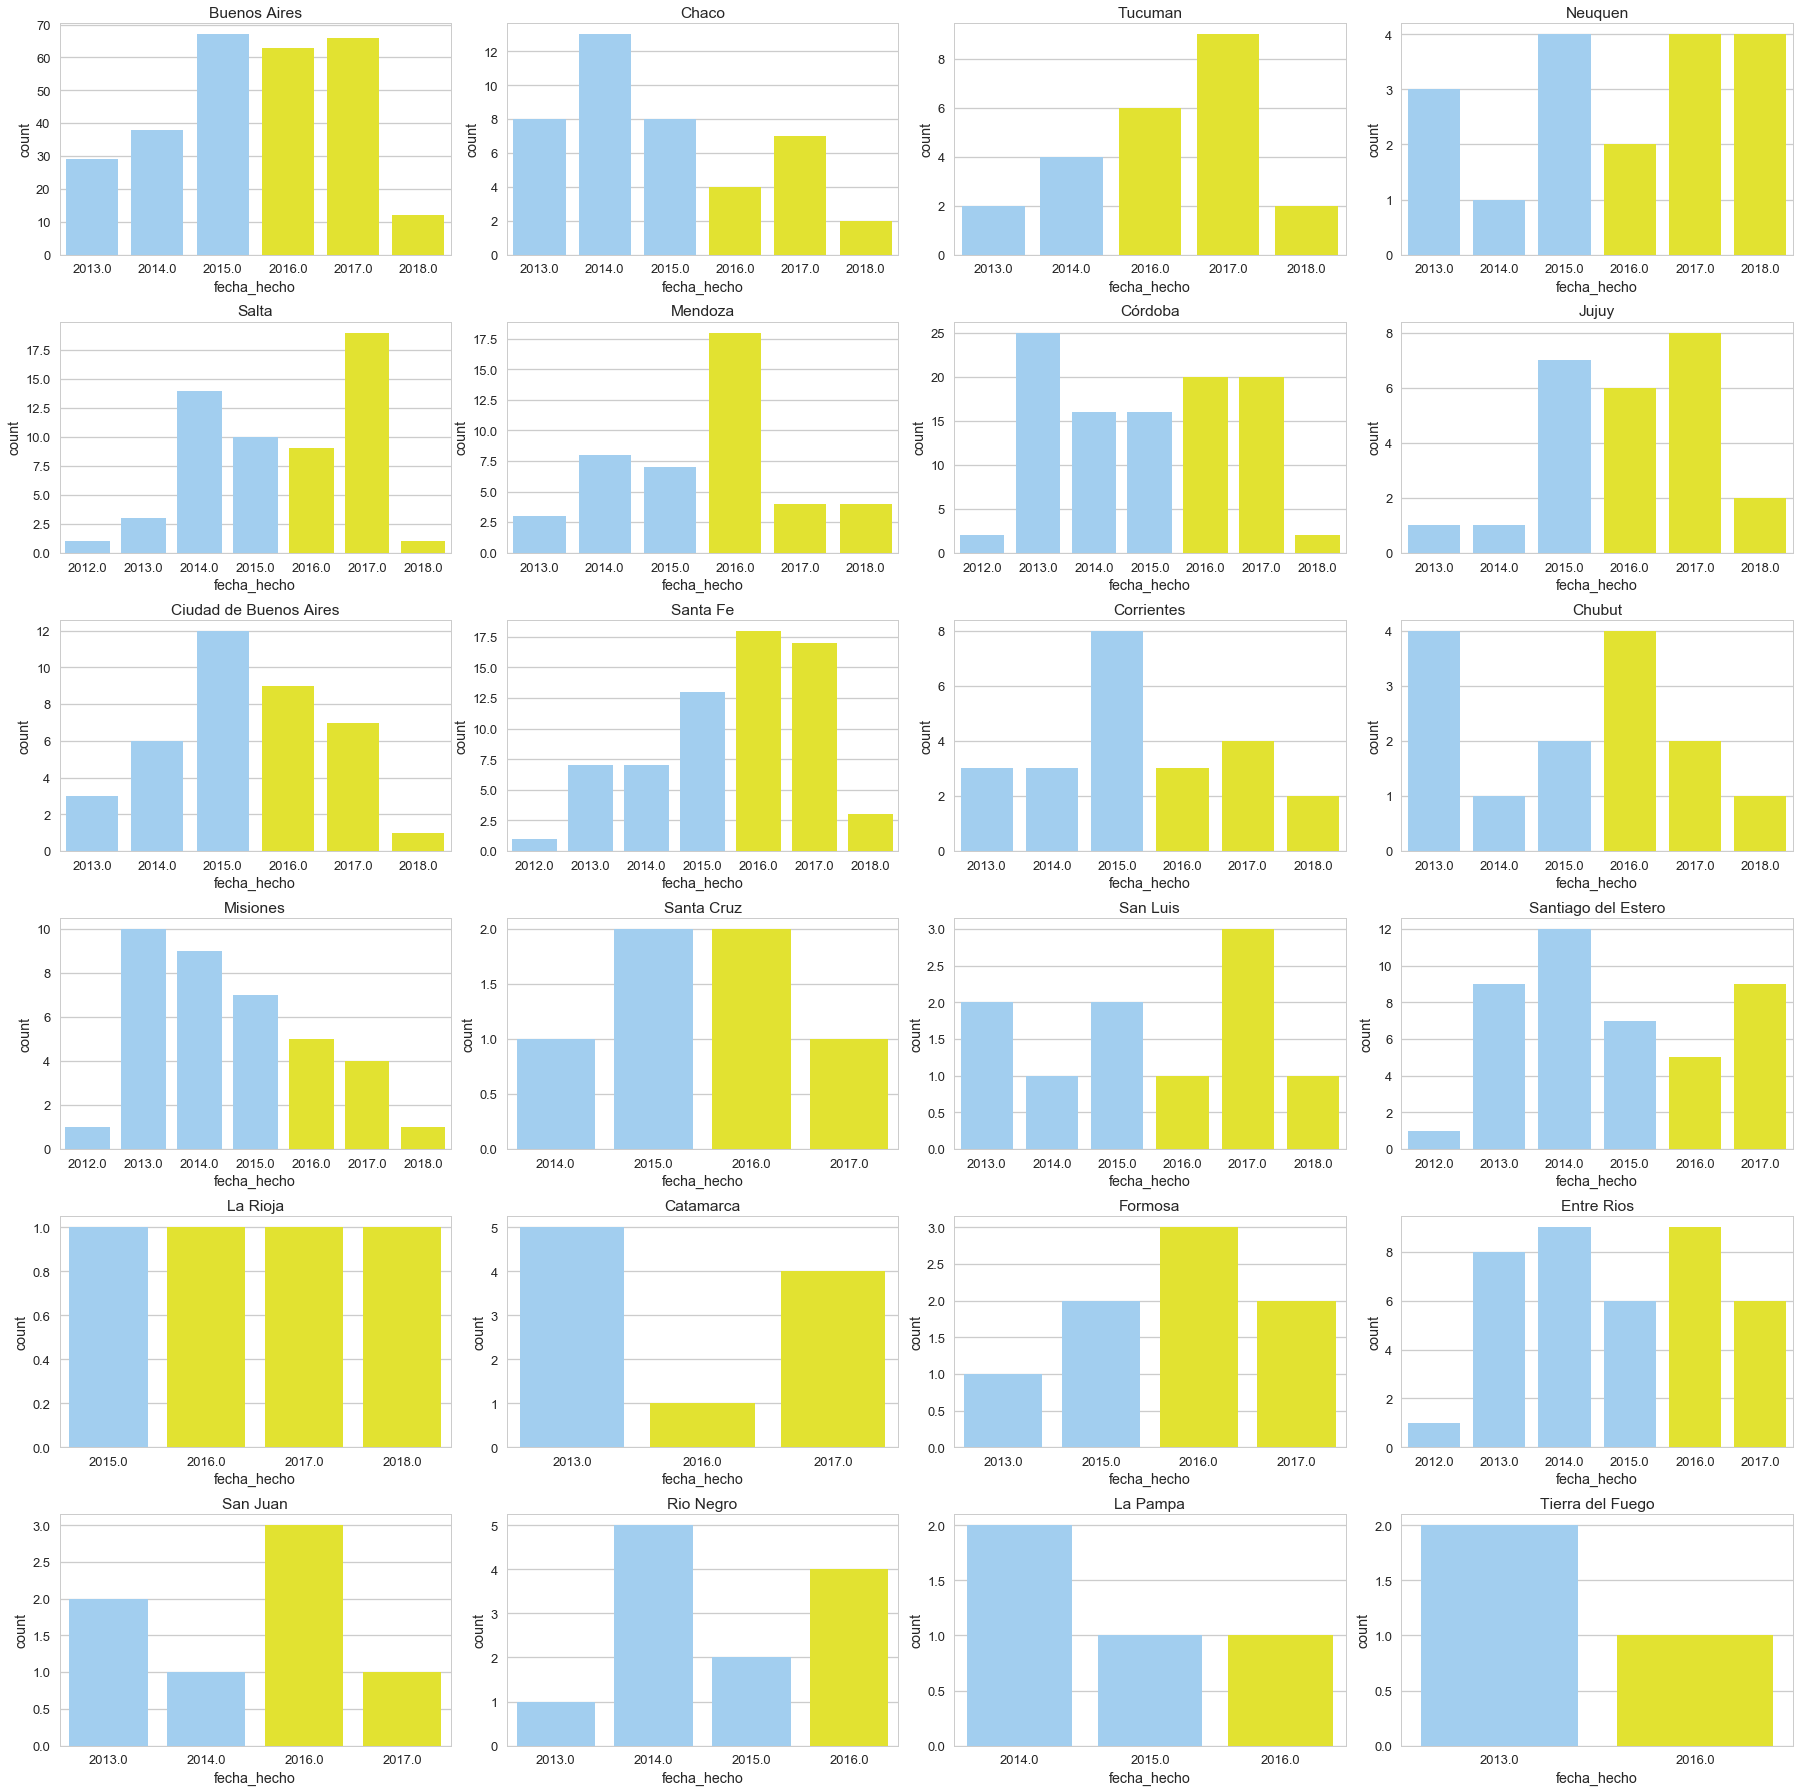

In [186]:

fig,axes = plt.subplots(6,4,figsize=(25,25))
i=0
j=0
for provincia in provincias:
    hab = censo2010.where(censo2010.provincia==provincia).dropna()["numero_habitantes"].get_values()[0]
    prov = data_prov(provincia)["fecha_hecho"].value_counts().to_dict()
    list = sorted(prov.items())
    x,y = zip(*list)
    y = y/hab
    #axes[i][j].plot(x,y,'-.')
    palette = []
    for k in x:
        if k <=2015.0:
            palette.append("light blue")
        else:
            palette.append("yellow")
    palette2 = sns.xkcd_palette(palette)
    sns.countplot(x="fecha_hecho",ax=axes[i][j],data=data_prov(provincia),palette=palette2)
    axes[i][j].set_title(provincia)
    
    if j==3:
        i = i + 1
        j = 0
    else:
        j = j + 1
plt.tight_layout()    

In [187]:
# tengo que identificar la comisidad omisiva considerando cada caso por separado
# primero saco los que no tienen datos
mod_comisiva = dataset.where(dataset['modalidad_comisiva'] != 'Sin datos')
mod_comisiva = mod_comisiva.modalidad_comisiva.dropna()

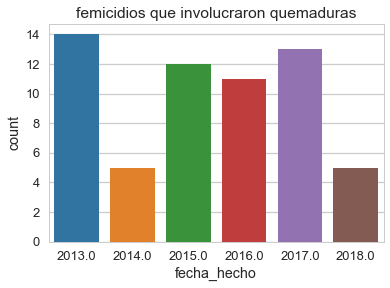

In [188]:
def solo_quemaduras(quem):
    if 'QUEMADURAS' in quem:
        quem = 'QUEMADURAS'
    else:
        quem = np.nan
    return quem
quemaduras = dataset_2.copy()
quemaduras = quemaduras.where(quemaduras.tipo_victima=="PRINCIPAL").dropna()
quemaduras["modalidad_comisiva"]=quemaduras["modalidad_comisiva"].apply(solo_quemaduras)
quemaduras = quemaduras.dropna()
quema = sns.countplot(x="fecha_hecho",data=quemaduras)
quema.set_title("femicidios que involucraron quemaduras")
plt.show()

Hubo un error en la consigna dada, ya que Wanda Taddei fue asesinada en 2010 y los datos de dataset comienzan en 2012, asi que no podremos hacer dicho análisis.

***Análisis por regiones de la Argentina***

In [189]:
noroeste = ["Jujuy","Salta","La Rioja","Tucuman","Catamarca","Santiago del Estero"]
noreste = ["Formosa","Chaco","Misiones","Corrientes","Entre Rios"]
cuyo = ["San Juan","San Luis","Mendoza"]
pampeana = ["Córdoba","Santa Fe","Buenos Aires","Ciudad de Buenos Aires","La Pampa"]
patagonica = ["Neuquen","Rio Negro","Chubut","Santa Cruz","Tierra del Fuego"]
def prov_a_region(prov):
    if prov in noroeste:
        return "Noroeste"
    elif prov in noreste:
        return "Noreste"
    elif prov in cuyo:
        return "Cuyo"
    elif prov in pampeana:
        return "Pampeana"
    elif prov in patagonica:
        return "Patagonica"
    else:
        return np.nan
data_region=dataset_2.copy()
data_region["lugar_hecho"] = data_region["lugar_hecho"].apply(prov_a_region).dropna()
data_region = data_region.filter(items=["lugar_hecho","fecha_hecho"]).dropna()
corr_dict = {}
for i in data_region.lugar_hecho.drop_duplicates().get_values():
     corr_dict[i] = data_region[data_region["lugar_hecho"]==i].fecha_hecho.value_counts()
data_matriz = pd.DataFrame(data=corr_dict)
data_matriz

,Cuyo,Noreste,Noroeste,Pampeana,Patagonica
2012.0,NaN,2,2,3,NaN
2013.0,8.0,35,20,74,10.0
2014.0,12.0,37,31,82,10.0
2015.0,9.0,35,25,116,11.0
2016.0,22.0,29,31,122,18.0
2017.0,8.0,24,58,124,8.0
2018.0,7.0,5,6,20,6.0


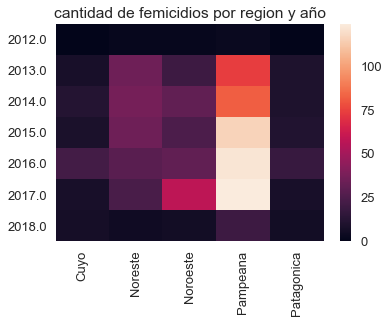

In [190]:
from matplotlib.colors import LogNorm

data_matriz = data_matriz.replace(np.nan,0)
ax = sns.heatmap(data=data_matriz)
ax.set_title("cantidad de femicidios por region y año")

plt.show()

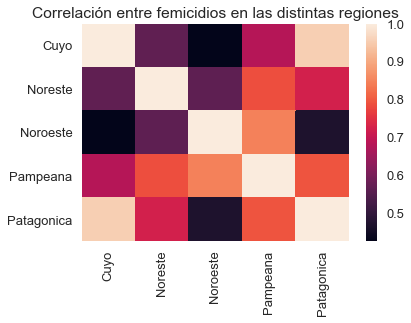

In [191]:
ax = sns.heatmap(data=data_matriz.corr())
ax.set_title("Correlación entre femicidios en las distintas regiones")
plt.show()